In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import minmax_scale 
from sklearn import preprocessing
from sklearn import datasets
from sklearn.datasets import load_boston 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso , Ridge

In [39]:
boston=load_boston()

C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [40]:
x_train,x_test,y_train,y_test=train_test_split(boston.data,boston.target , test_size=0.2 , shuffle=True)

In [41]:
lasso=Lasso(alpha=0.1,normalize=True)

In [42]:
lasso.fit(x_train, y_train)

C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.1, normalize=True)

In [43]:
lasoo_coef=lasso.coef_

In [44]:
lasoo_coef

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.26124003, -0.        ,  0.        , -0.        , -0.        ,
       -0.29471803,  0.        , -0.4697509 ])

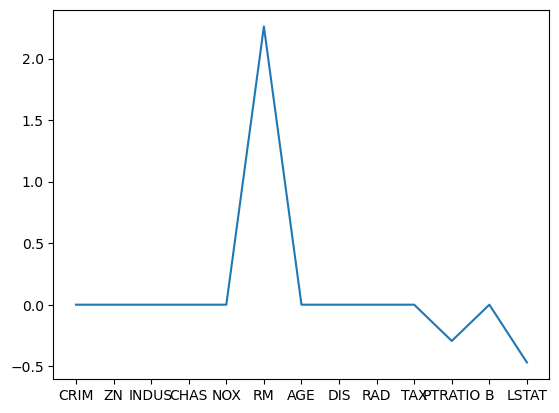

In [45]:
plt.plot(range(13),lasoo_coef)
plt.xticks(range(13),boston.feature_names)
plt.show()

In [46]:
y_pred=lasso.predict(x_test)

In [47]:
mse_boston=mean_absolute_error(y_test, y_pred)
mse_boston

4.805025478241623

In [48]:
ridge=Ridge(alpha=0.1, normalize=True)

In [49]:
ridge.fit(x_train,y_train)

C:\Users\mahnaz\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(alpha=0.1, normalize=True)

In [56]:
ridge_coef=ridge.coef_
ridge_coef

array([-7.40747327e-02,  3.22688640e-02, -6.57040567e-02,  2.95467025e+00,
       -1.03507102e+01,  3.39695705e+00, -7.43387449e-04, -9.60325218e-01,
        1.30080284e-01, -5.38441999e-03, -8.46434812e-01,  8.69071237e-03,
       -4.65757857e-01])

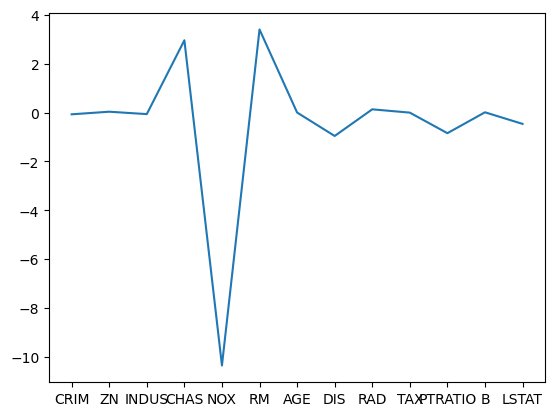

In [57]:
plt.plot(range(13),ridge_coef)
plt.xticks(range(13),boston.feature_names)
plt.show()

In [50]:
y_pred_ridge=ridge.predict(x_test)

In [54]:
mse_ridge=mean_absolute_error(y_test,y_pred_ridge)

In [55]:
mse_ridge

3.5897177222833734